# Monday Meeting Analyses

In [2]:
!pip install requests

  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached charset_normalizer-3.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (35 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
Using cached requests-2.32.4-py3-none-any.whl (64 kB)
Using cached charset_normalizer-3.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (147 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [requests]2/4 [charset_normalizer]


In [1]:
# Geostack

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
import xdem
from shapely import wkt
from functions import *

In [2]:
get_topo(bounds=[38.2, -80, 37.7, -81.5], name='Field_site.tiff')

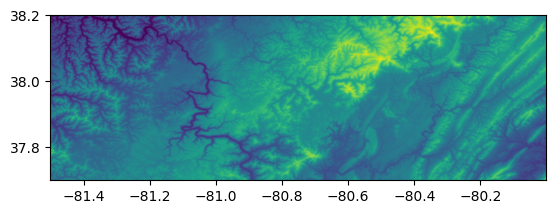

In [3]:
with rio.open('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/Field_site.tiff') as src:
    show(src)

In [26]:
avenza = gpd.GeoDataFrame(data=pd.read_csv('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/meadow_knp_rivers.csv', index_col=0))
geoms = []
for geometry in avenza['geometry']:
    geoms.append(wkt.loads(geometry))
avenza.geometry = geoms
avenza.set_crs(rio.CRS.from_epsg(4326))
mask = avenza.name.isin(['Big Clear Creek', 'Little Clear Creek'])
avenza_sub = avenza[mask]
avenza_sub.to_file('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/meadow.shp')

/sciclone/home/ntlewis/Nick-Lewis-Research/.venv/lib64/python3.11/site-packages/pyogrio/geopandas.py:710: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


## Importing dems, extracting Terrain Roughness Index (TRI)

In [2]:
# Importing KSN dfs.

b_0_kn = pd.read_csv('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/basins_0_reproj.tiff_knickpoints.csv', index_col = 0)
b_1_kn = pd.read_csv('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/basins_1_reproj.tiff_knickpoints.csv', index_col = 0)

In [3]:
b_0_kn = gpd.GeoDataFrame(data=b_0_kn, geometry=gpd.points_from_xy(b_0_kn.x, b_0_kn.y), crs=rio.CRS.from_epsg(2283))
b_1_kn = gpd.GeoDataFrame(data=b_1_kn, geometry=gpd.points_from_xy(b_1_kn.x, b_1_kn.y), crs=rio.CRS.from_epsg(2283))

In [4]:
b_0_kn = b_0_kn.to_crs(rio.CRS.from_epsg(4326))
b_1_kn = b_1_kn.to_crs(rio.CRS.from_epsg(4326))

In [5]:
b_0_sorted = b_0_kn.sort_values(by='elevation', ascending= False)
b_1_sorted = b_1_kn.sort_values(by='elevation', ascending= False)

In [6]:
b_0_sorted

basin_key  col  nodeID  row  sign  source_key        chi   delta_ksn  \
77           0  137  234115  441     1          37  15.438570    1.421793   
75           0  157  226276  431    -1          37  14.171692 -143.573670   
71           0  163  213634  415    -1          41  13.911592  -24.944809   
128          0   56  371425  613     1          30  17.481504    6.403761   
123          0   68  356235  594    -1          30  16.372091  -21.022976   
..         ...  ...     ...  ...   ...         ...        ...         ...   
285          0  754  571956  936     1           0   0.583120    0.000000   
286          0  752  572683  938     1           0   0.569074    0.000000   
287          0  751  573045  939     1           0   0.562050    0.000000   
288          0  735  586072  977     1           0   0.006995    0.000000   
195          0  734  585770  976     1           0   0.000000   10.556708   

     delta_zseg  drainage_area   elevation  flow_distance           x  \
77     0.000000   1.375190e+07  1007.12805   112634.98000  11293863.0   
75     0.000000   1.802791e+07   979.52640   110399.04000  11295671.0   
71     0.000000   1.102114e+07   958.26130   109781.60000  11296214.0   
128    0.000000   1.842853e+07   955.78430   122074.71000  11286539.0   
123    0.000000   2.254102e+07   930.94510   119907.26000  11287624.0   
..          ...            ...         ...            ...         ...   
285    0.078140   2.932311e+09   165.04460    10637.07200  11349652.0   
286    0.078262   2.932548e+09   164.74036    10381.32400  11349471.0   
287    0.074890   2.932614e+09   164.60368    10253.45000  11349381.0   
288    0.101944   2.958499e+09   158.74623      127.87434  11347934.0   
195    0.000000   4.930033e+09   158.46886        0.00000  11347844.0   

             y                    geometry  
77   6613953.0  POINT (-79.15434 37.80839)  
75   6614857.5   POINT (-79.1481 37.81091)  
71   6616304.0   POINT (-79.14626 37.8149)  
128  6598401.0  POINT (-79.17929 37.76554)  
123  6600119.0  POINT (-79.17558 37.77028)  
..         ...                         ...  
285  6569195.0  POINT (-78.96047 37.68642)  
286  6569014.0   POINT (-78.9611 37.68592)  
287  6568923.5   POINT (-78.9614 37.68567)  
288  6565487.5  POINT (-78.96634 37.67622)  
195  6565578.0  POINT (-78.96666 37.67646)  

[290 rows x 15 columns]

Text(0.5, 1.0, "Massie's Mill TRI")

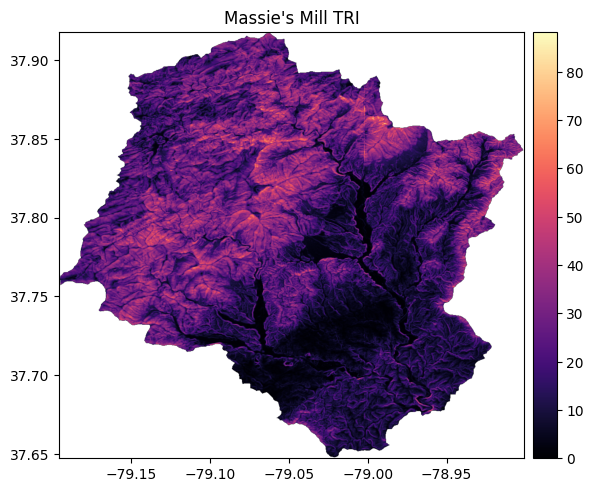

In [7]:
# Importing to xdem for terrain ruggedness index (TRI) calculations.
m_dem = xdem.DEM('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/basins_0.tiff')

# Gives me elevation difference for each pixel in a 3x3 window (90m x 90m)
m_tri = m_dem.terrain_ruggedness_index(window_size=3)

# Mapping.
m_tri.plot(cmap='magma')
plt.title("Massie's Mill TRI")

In [8]:
# Getting TRI values for each pixel.
tri_data = m_tri.data

# Ensure tri_data is a numpy array
tri_data = np.asarray(tri_data)

# Mask out no_data/nan values
tri_valid_mask = ~np.isnan(tri_data)
tri_valid_values = tri_data[tri_valid_mask]

# Calculate 10th percentile
percentile_10 = np.percentile(tri_valid_values, 10)

# Boolean mask: True if below 10th percentile and valid, False otherwise (including no_data)
TRI_bool_mask = np.where(tri_valid_mask & (tri_data < percentile_10), True, False)

# If you want to guarantee dtype is bool and no None values:
m_TRI_bool_mask = TRI_bool_mask.astype(bool)
m_TRI_bool_mask  # 2D boolean array

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(974, 1062))

In [9]:
# Getting elevation values for each pixel.
dem_data = m_dem.data

dem_data = np.asarray(dem_data)

# Mask out no_data/nan values
dem_valid_mask = ~np.isnan(dem_data)
dem_valid_values = dem_data[dem_valid_mask]

# Calculate 90th percentile
dem_percentile_90 = np.percentile(dem_valid_values, 90)

# Boolean mask: True if above 90th percentile and valid, False otherwise (including no_data)
m_dem_bool_mask = np.where(dem_valid_mask & (dem_data > dem_percentile_90), True, False)
m_dem_bool_mask  # 2D boolean array

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(974, 1062))

In [10]:
nrows, ncols = m_tri.data.shape
rows, cols = np.indices((nrows, ncols))
m_xs, m_ys = m_tri.transform * (cols, rows)

In [11]:
m_df = pd.DataFrame(data=[m_xs.flatten(), m_ys.flatten(), m_TRI_bool_mask.flatten(), m_dem_bool_mask.flatten()]).T

Text(0.5, -42.83333333333363, 'Longitude (°)')

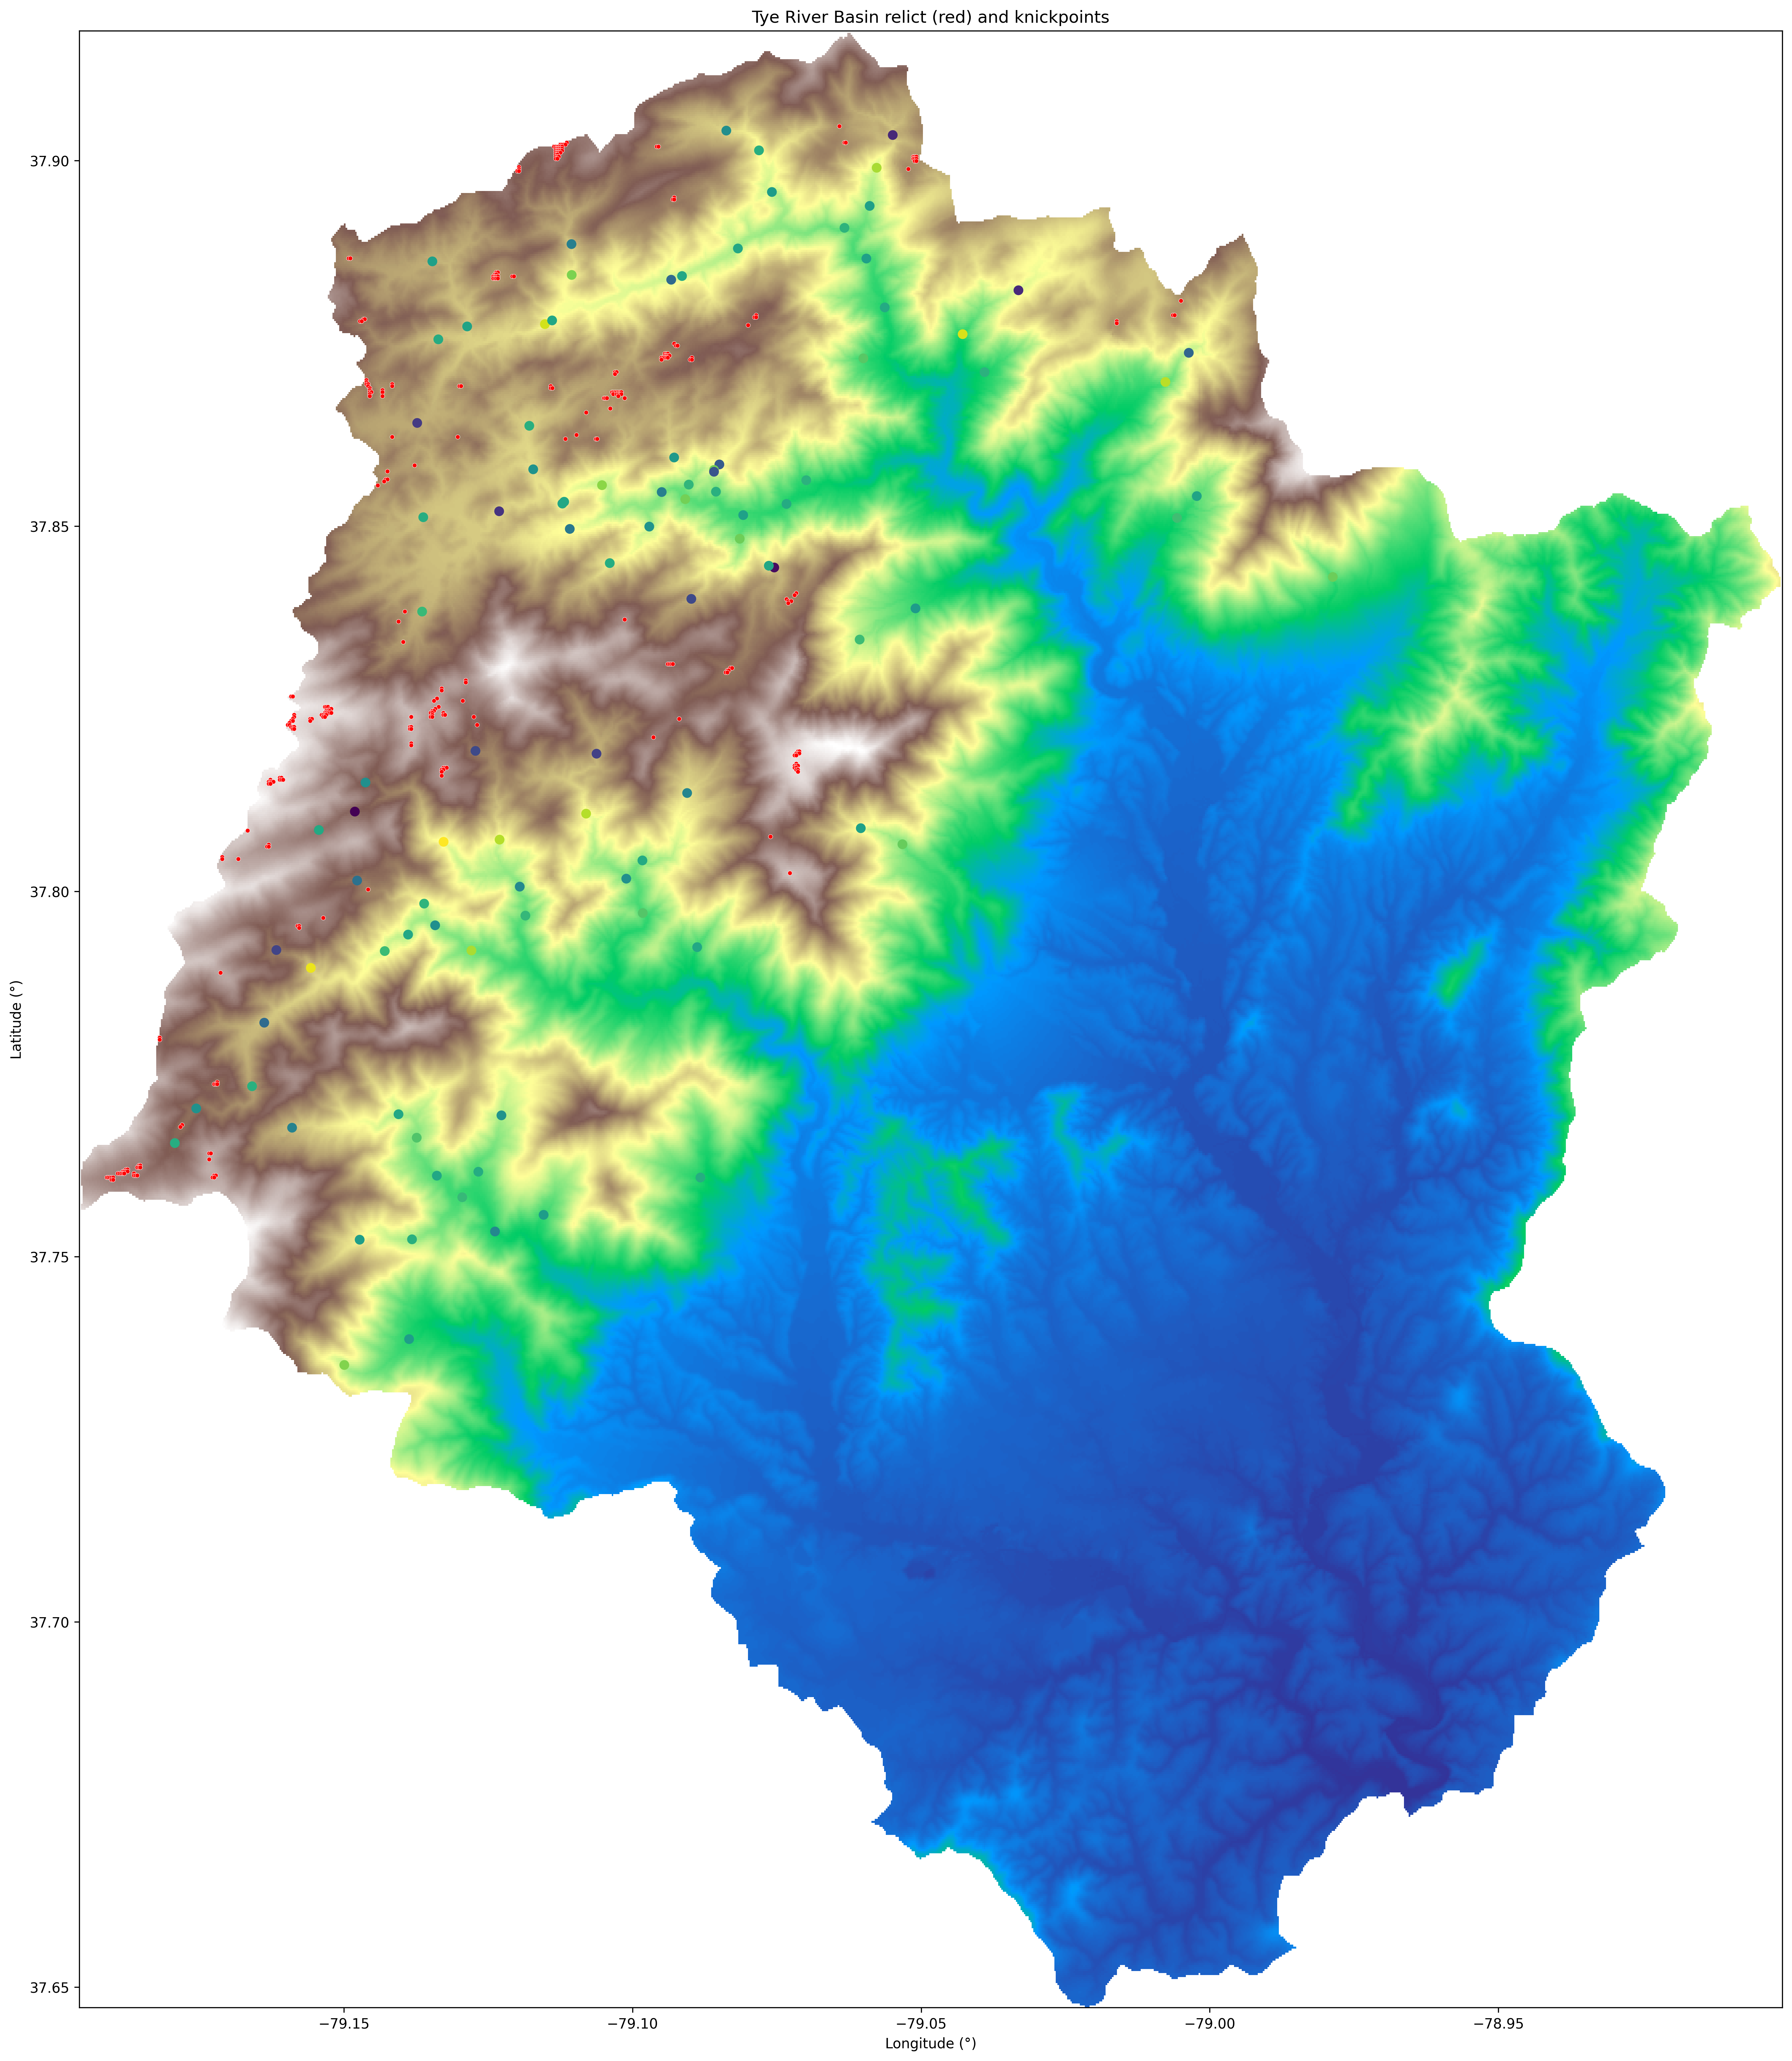

In [13]:
fig, ax = plt.subplots(figsize=(20,20), dpi=300)
m_dem.plot(cmap='terrain', ax=ax, add_cbar=False)
sns.scatterplot(data=m_df[(m_df[2]== True) & (m_df[3] == True)], x=0, y=1, ax=ax, s=10, c='red')
b_0_sorted[0:100].plot(c=b_0_sorted['delta_ksn'], ax=ax, legend=True)
ax.set_title('Tye River Basin relict (red) and knickpoints')
ax.set_ylabel('Latitude (°)')
ax.set_xlabel('Longitude (°)')

Text(0.5, 1.0, 'Smoot TRI')

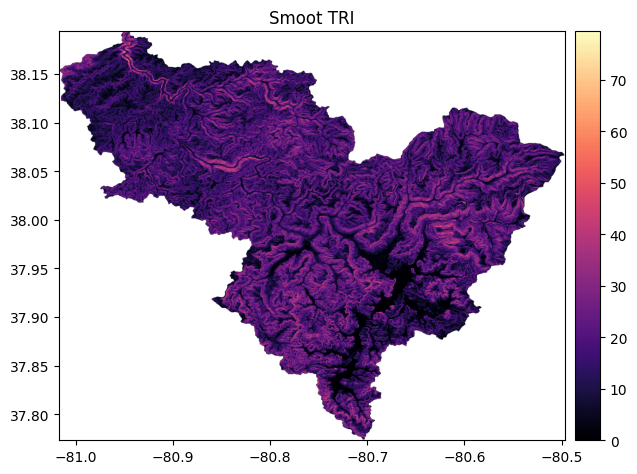

In [14]:
smoot_dem = xdem.DEM('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/basins_1.tiff')
s_tri = smoot_dem.terrain_ruggedness_index()
s_tri.plot(cmap='magma')
plt.title("Smoot TRI")

In [15]:
# Getting TRI values for each pixel.
tri_data = s_tri.data

# Ensure tri_data is a numpy array
tri_data = np.asarray(tri_data)

# Mask out no_data/nan values
tri_valid_mask = ~np.isnan(tri_data)
tri_valid_values = tri_data[tri_valid_mask]

# Calculate 10th percentile
percentile_10 = np.percentile(tri_valid_values, 10)

# Boolean mask: True if below 10th percentile and valid, False otherwise (including no_data)
TRI_bool_mask = np.where(tri_valid_mask & (tri_data < percentile_10), True, False)

# If you want to guarantee dtype is bool and no None values:
s_TRI_bool_mask = TRI_bool_mask.astype(bool)
s_TRI_bool_mask  # 2D boolean array

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]],
      shape=(1515, 1872))

In [16]:
# Getting elevation values for each pixel.
dem_data = smoot_dem.data

dem_data = np.asarray(dem_data)

# Mask out no_data/nan values
dem_valid_mask = ~np.isnan(dem_data)
dem_valid_values = dem_data[dem_valid_mask]

# Calculate 90th percentile
dem_percentile_90 = np.percentile(dem_valid_values, 90)

# Boolean mask: True if above 90th percentile and valid, False otherwise (including no_data)
s_dem_bool_mask = np.where(dem_valid_mask & (dem_data > dem_percentile_90), True, False)
s_dem_bool_mask  # 2D boolean array

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]],
      shape=(1515, 1872))

In [17]:
nrows, ncols = s_tri.data.shape
rows, cols = np.indices((nrows, ncols))
s_xs, s_ys = s_tri.transform * (cols, rows)

In [18]:
s_df = pd.DataFrame(data=[s_xs.flatten(), s_ys.flatten(), s_TRI_bool_mask.flatten(), s_dem_bool_mask.flatten()]).T

Text(0.5, -26.243087376683473, 'Longitude (°)')

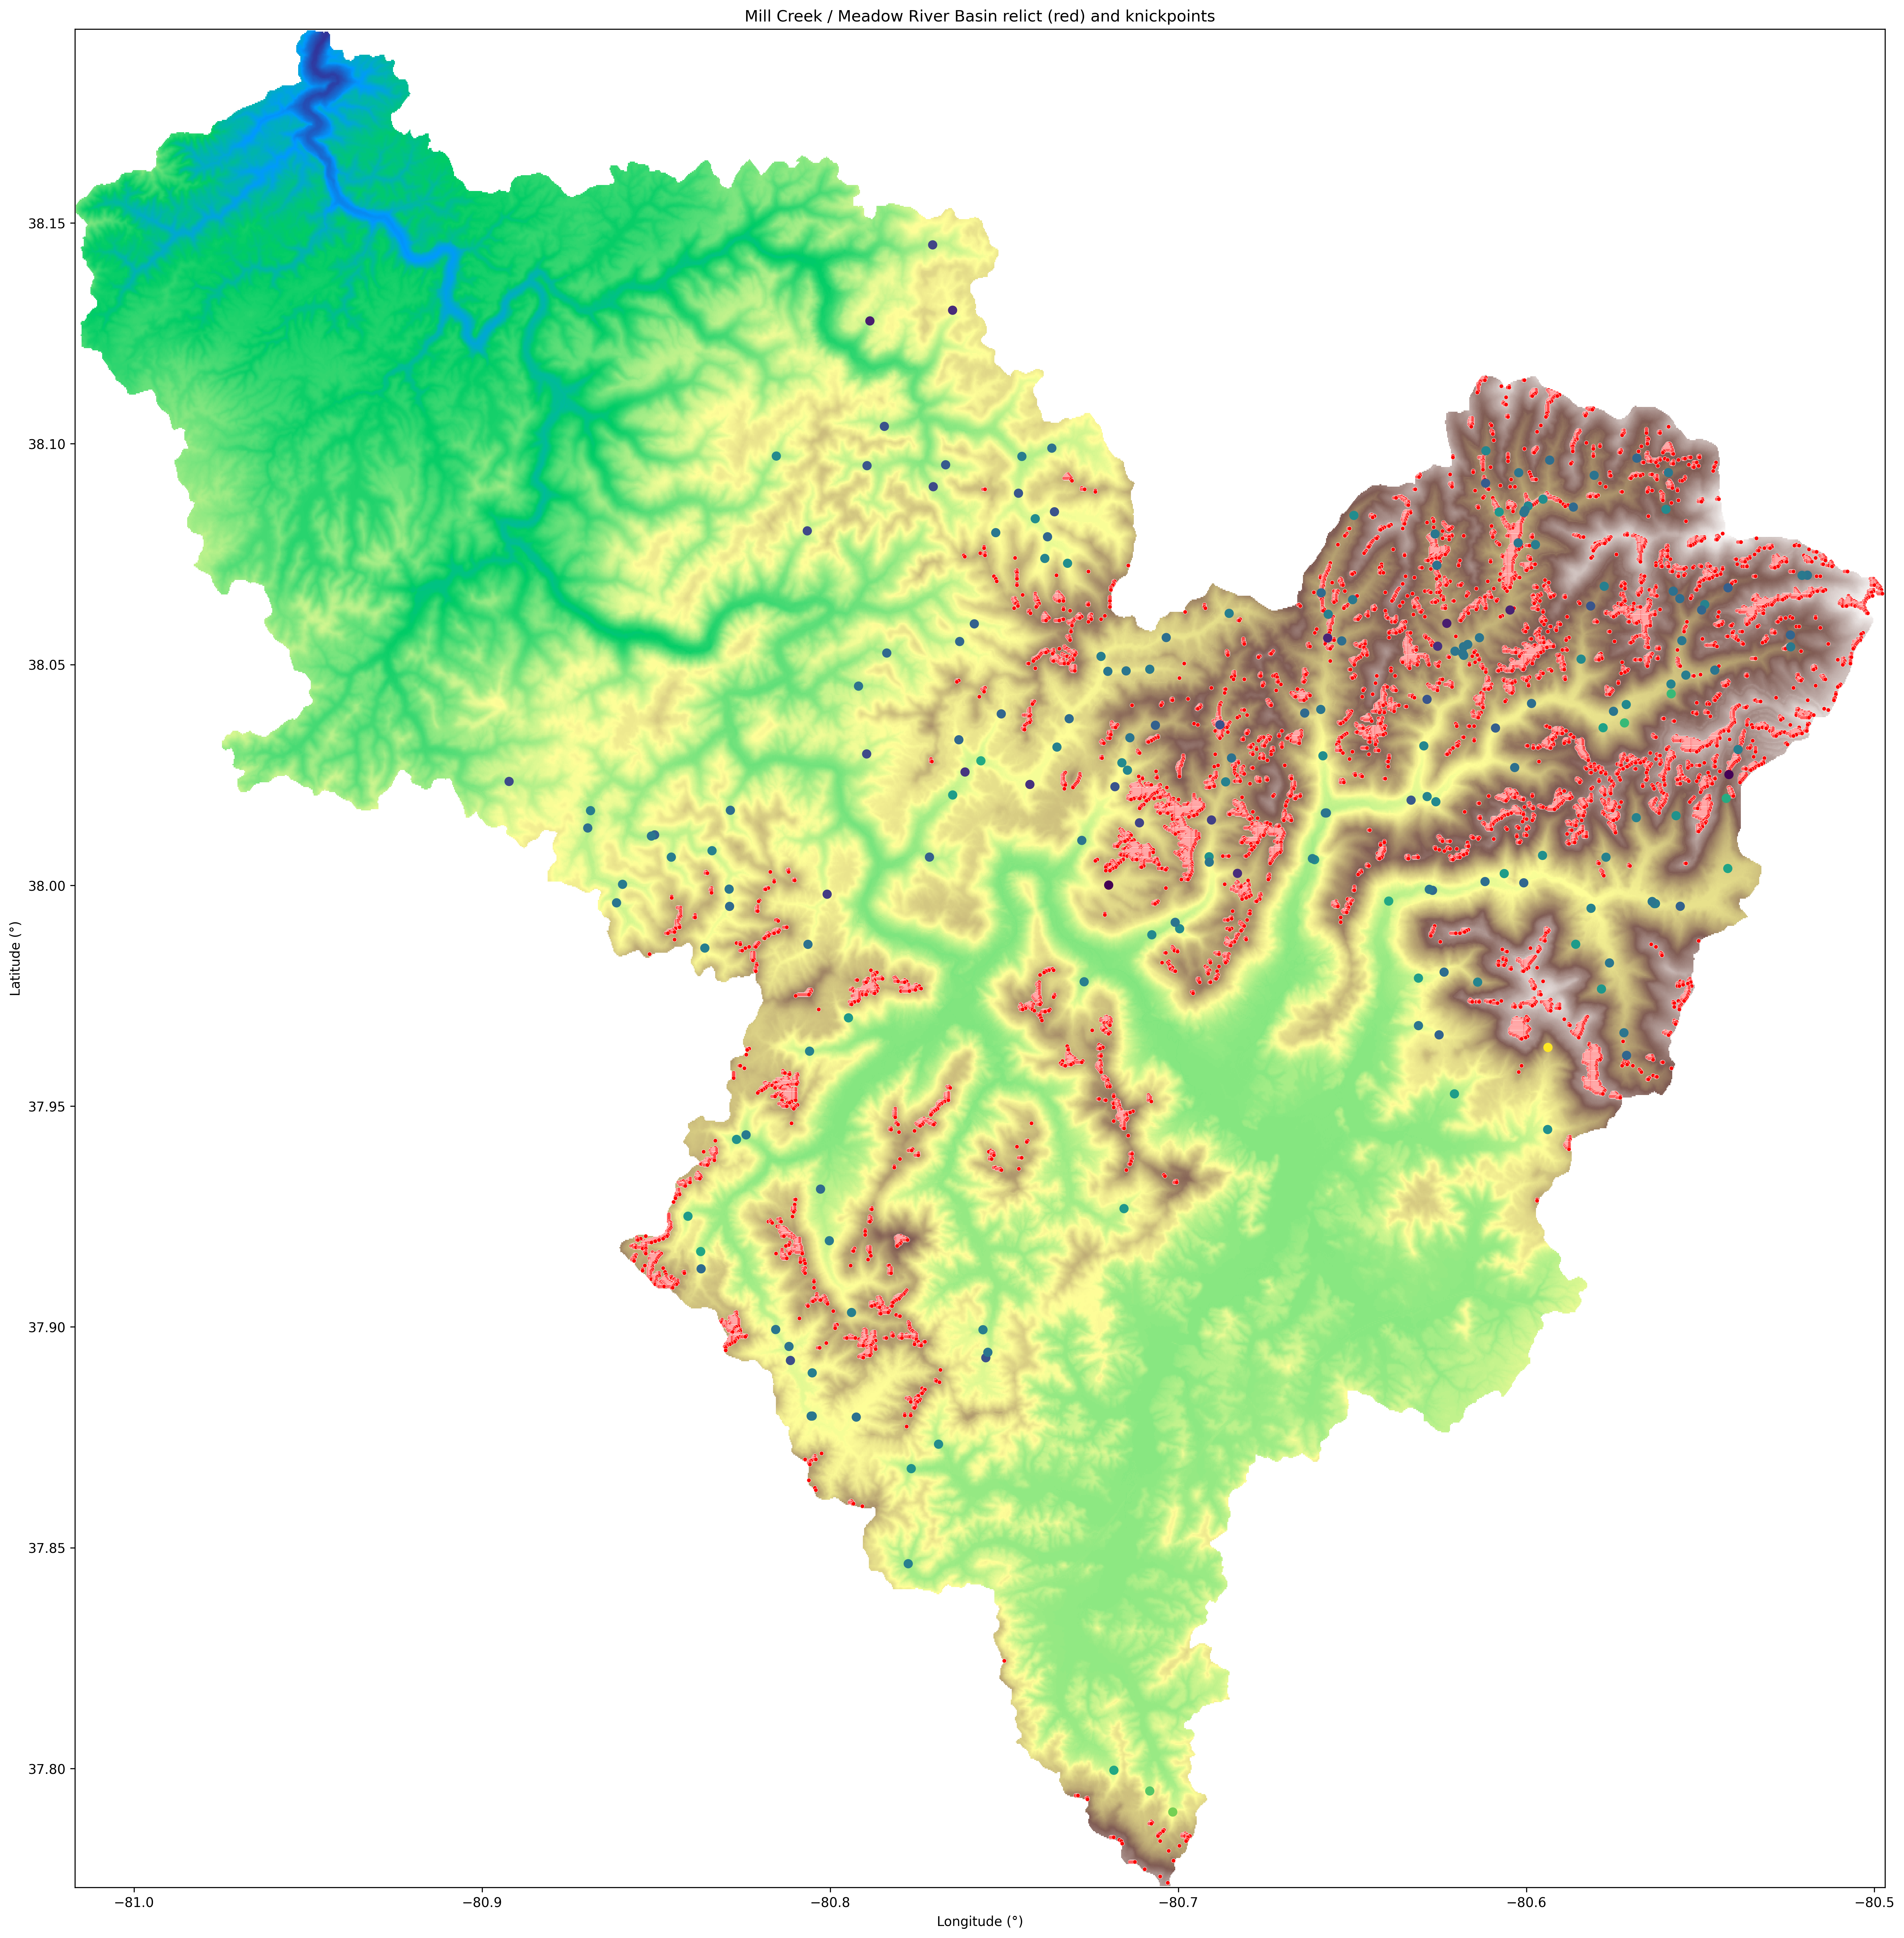

In [31]:
fig, ax = plt.subplots(figsize=(20,20), dpi=300)
smoot_dem.plot(cmap='terrain', ax=ax, add_cbar=False)
sns.scatterplot(data=s_df[(s_df[2]== True) & (s_df[3] == True)], x=0, y=1, ax=ax, s=10, c='red')
b_1_sorted[0:200].plot(c=b_1_sorted['delta_ksn'], ax=ax, legend=True)
ax.set_title('Mill Creek / Meadow River Basin relict (red) and knickpoints')
ax.set_ylabel('Latitude (°)')
ax.set_xlabel('Longitude (°)')

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20), dpi=300)
basemap = show(rio.open('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/field_area.tiff'), ax=ax, title="Field Area", cmap='binary', with_bounds=True)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
b_0_map = m_dem.plot(ax=ax, cmap='terrain', add_cbar=False)
b_1_map = smoot_dem.plot(ax=ax, cmap='terrain', add_cbar=False)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_ylabel('Latitude (°)')
ax.set_xlabel('Longitude (°)')
plt.show()

In [22]:
!pip install fiona

  Using cached fiona-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (56 kB)
Using cached fiona-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)


In [24]:
import fiona as fn

fn.listlayers('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/WBD_National_GDB/WBD_National_GDB.gdb')

['WBDHU12',
 'NWISDrainageLine',
 'WBDHU8',
 'NonContributingDrainageLine',
 'WBDHU4',
 'WBDHU16',
 'NonContributingDrainageArea',
 'NWISDrainageArea',
 'WBDHU6',
 'WBDHU2',
 'WBDHU14',
 'WBDLine',
 'WBDHU10',
 'FeatureToMetadata',
 'ExternalCrosswalk',
 'HUMod',
 'MetaProcessDetail',
 'MetaSourceDetail',
 'ProcessingParameters',
 'UpdateStatus']

In [32]:
wsheds = gpd.read_file('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/WBD_National_GDB/WBD_National_GDB.gdb', layers=['WBDHU16'])

/sciclone/home/ntlewis/Nick-Lewis-Research/.venv/lib64/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver OpenFileGDB does not support open option LAYERS
  return ogr_read(
/sciclone/home/ntlewis/Nick-Lewis-Research/.venv/lib64/python3.11/site-packages/pyogrio/geopandas.py:275: UserWarning: More than one layer found in 'WBD_National_GDB.gdb': 'WBDHU12' (default), 'NWISDrainageLine', 'WBDHU8', 'NonContributingDrainageLine', 'WBDHU4', 'WBDHU16', 'NonContributingDrainageArea', 'NWISDrainageArea', 'WBDHU6', 'WBDHU2', 'WBDHU14', 'WBDLine', 'WBDHU10', 'FeatureToMetadata', 'ExternalCrosswalk', 'HUMod', 'MetaProcessDetail', 'MetaSourceDetail', 'ProcessingParameters', 'UpdateStatus'. Specify layer parameter to avoid this warning.
  result = read_func(


In [38]:
wsheds

tnmid  \
0       {AAF0D733-828B-4B8E-9E52-388A49AC0A23}   
1       {FEEC96BB-D4C0-468F-A345-6996A458D7A7}   
2       {5954C8E6-710A-4F46-9409-C39F7A4E8031}   
3       {6042907D-3DB7-4C8A-9362-889E4CDC4102}   
4       {A802D673-860B-4BD3-9EA1-1C954F9F03B9}   
...                                        ...   
103063  {6381B1C2-F873-4BA6-8083-B63F02CA427B}   
103064  {184B9A84-EA63-49D1-8A9E-3F3F934B5349}   
103065  {E99293AA-1015-4C14-94A7-19D7C76F58B3}   
103066  {56FA2744-2E32-4212-9B7D-4BAC36093377}   
103067  {31C703FB-BB9C-418F-B892-E6A6FE1B69F2}   

                                  metasourceid  \
0       {511D2AC8-11BA-45FC-AB98-F69D693D4C44}   
1       {511D2AC8-11BA-45FC-AB98-F69D693D4C44}   
2       {511D2AC8-11BA-45FC-AB98-F69D693D4C44}   
3       {511D2AC8-11BA-45FC-AB98-F69D693D4C44}   
4       {511D2AC8-11BA-45FC-AB98-F69D693D4C44}   
...                                        ...   
103063  {223F29BD-DAF9-49D8-8E62-D18F7759783A}   
103064  {223F29BD-DAF9-49D8-8E62-D18F7759783A}   
103065  {223F29BD-DAF9-49D8-8E62-D18F7759783A}   
103066  {223F29BD-DAF9-49D8-8E62-D18F7759783A}   
103067  {223F29BD-DAF9-49D8-8E62-D18F7759783A}   

                                sourcedatadesc  \
0             Watershed Boundary Dataset (WBD)   
1             Watershed Boundary Dataset (WBD)   
2             Watershed Boundary Dataset (WBD)   
3             Watershed Boundary Dataset (WBD)   
4             Watershed Boundary Dataset (WBD)   
...                                        ...   
103063  National Hydro Network (NHN) Work Unit   
103064  National Hydro Network (NHN) Work Unit   
103065  National Hydro Network (NHN) Work Unit   
103066  National Hydro Network (NHN) Work Unit   
103067  National Hydro Network (NHN) Work Unit   

                                         sourceoriginator sourcefeatureid  \
0       Natural Resources and Conservation Service and...            None   
1       Natural Resources and Conservation Service and...            None   
2       Natural Resources and Conservation Service and...            None   
3       Natural Resources and Conservation Service and...            None   
4       Natural Resources and Conservation Service and...            None   
...                                                   ...             ...   
103063  Government of Canada; Natural Resources Canada...            None   
103064  Government of Canada; Natural Resources Canada...            None   
103065  Government of Canada; Natural Resources Canada...            None   
103066  Government of Canada; Natural Resources Canada...            None   
103067  Government of Canada; Natural Resources Canada...            None   

                        loaddate referencegnis_ids  areaacres  areasqkm  \
0      2024-08-15 06:55:45+00:00           1817535   13211.47     53.46   
1      2024-08-15 06:55:45+00:00            653935   10514.34     42.55   
2      2024-08-15 06:55:45+00:00            641985   15561.22     62.97   
3      2024-08-15 06:55:45+00:00            315688   31033.21    125.59   
4      2024-08-15 06:55:45+00:00            313139   28839.94    116.71   
...                          ...               ...        ...       ...   
103063 2024-10-10 13:53:49+00:00              None  654553.78   2648.89   
103064 2024-10-10 13:53:49+00:00           1416405  643399.16   2603.75   
103065 2024-10-10 13:53:49+00:00              None  825063.09   3338.91   
103066 2024-10-10 13:53:49+00:00              None  798418.79   3231.09   
103067 2024-10-10 13:53:49+00:00              None  995247.69   4027.63   

       states  ...                             name hutype humod  \
0       IA,MN  ...   Judicial Ditch Number Thirteen      S    NM   
1          MN  ...  West Branch Lac qui Parle River      S    NM   
2          MN  ...   County Ditch Number Thirtyfour      S    NM   
3          GA  ...                Upper Horse Creek      S    NM   
4          GA  ...                    Crooked Creek      S    NM   
... 

In [46]:
points_n_sheds = gpd.sjoin(b_1_sorted[0:201], wsheds.to_crs(rio.CRS.from_epsg(4326))[['name','geometry']], how='left')
# points_n_sheds.to_csv('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/tye_knp_rivers')
display(points_n_sheds)
points_n_sheds[['delta_ksn', 'elevation', 'geometry', 'name']].to_csv('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/meadow_knp_rivers.csv')

basin_key   col   nodeID   row  sign  source_key        chi  delta_ksn  \
418          0  1642   404867   545     1           8  22.794758   0.000000   
142          0  1637   404862   545     1           8  22.517447   2.545202   
230          0  1574   635892   705     1           7  24.124414   6.352466   
241          0  1565   665173   728    -1           7  22.829310 -72.222480   
119          0  1512   323982   481     1           9  22.261600  16.123928   
..         ...   ...      ...   ...   ...         ...        ...        ...   
302          0   961   853680   906     1         173   8.571302   7.241135   
266          0  1176   743034   797     1         120  10.714113   7.347725   
379          0   784  1236784  1441     1           5  22.647190   7.326005   
292          0  1025   814709   864     1         133   8.578077  15.386135   
351          0   824  1092227  1186     1         155  14.082255  15.627394   

     delta_zseg  drainage_area   elevation  flow_distance           x  \
418    6.073486     12724280.0  1136.35530      313954.50  10901647.0   
142    0.000000     13564114.0  1129.97180      313509.50  10901202.0   
230    0.000000     20385786.0  1121.75390      315464.25  10895594.0   
241    0.000000     30218182.0  1108.92960      312707.75  10894793.0   
119    0.000000     13952339.0  1069.39550      314067.62  10890076.0   
..          ...            ...         ...            ...         ...   
302    0.000000     25963552.0   764.68524      204396.70  10841031.0   
266    0.000000     13064967.0   763.09390      250223.33  10860168.0   
379    0.000000     15418088.0   762.55660      318227.25  10825276.0   
292    0.000000    172514620.0   762.51290      207027.55  10846727.0   
351    0.000000     17565210.0   762.51260      215829.03  10828836.0   

             y                    geometry  index_right  \
418  6715022.5  POINT (-80.51925 38.07023)        53471   
142  6715022.5    POINT (-80.5208 38.0702)        53471   
230  6700780.5  POINT (-80.53918 38.03076)        53503   
241  6698733.5   POINT (-80.5418 38.02509)        53503   
119  6720719.0  POINT (-80.55988 38.08516)        53471   
..         ...                         ...          ...   
302  6682889.5  POINT (-80.72704 37.97816)         5454   
266  6692591.5  POINT (-80.66146 38.00605)         5454   
379  6635268.5  POINT (-80.77758 37.84637)        53528   
292  6686628.0    POINT (-80.7076 37.9888)         5454   
351  6657966.5   POINT (-80.7672 37.90893)        53533   

                         name  
418           Big Clear Creek  
142           Big Clear Creek  
230        Little Clear Creek  
241        Little Clear Creek  
119           Big Clear Creek  
..                        ...  
302   Mill Creek-Meadow River  
266   Mill Creek-Meadow River  
379  Otter Creek-Meadow River  
292   Mill Creek-Meadow River  
351              Sewell Creek  

[201 rows x 17 columns]